In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
col_types = {"mapped_veh_id": np.int32,
            #"RS_E_OilPress_PC1": np.int32,
            #"RS_E_OilPress_PC2": np.int32,
            #"RS_E_RPM_PC1": np.int32,
            #"RS_E_RPM_PC2": np.int32,
            #"RS_E_InAirTemp_PC1": np.int32,
            #"RS_E_InAirTemp_PC2": np.int32,
            #"RS_E_WatTemp_PC1": np.int32,
            #"RS_E_WatTemp_PC2": np.int32,
            #"RS_T_OilTemp_PC1": np.int32,
            #"RS_T_OilTemp_PC2": np.int32
            }
data = pd.read_csv("../data/ar41_for_ulb.csv", delimiter=";", index_col=0, dtype=col_types)


In [ ]:
data[:10]

In [ ]:
data.shape

In [ ]:
summary = data.describe()
summary

In [ ]:
data.duplicated(subset=("timestamps_UTC", "lat", "lon"), keep='first').sum()

### Save sorted dataset

In [ ]:
data = data.sort_values(by=["mapped_veh_id", "timestamps_UTC"])
data.to_csv("../data/sorted_full_data.csv", sep=";", index=False)

In [7]:
data

,mapped_veh_id,timestamps_UTC,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2
0,181,2023-08-01 03:44:12,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0
1,143,2023-08-01 06:36:29,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0
2,183,2023-08-24 06:53:54,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0
3,177,2023-08-01 13:53:38,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0
4,143,2023-08-24 07:02:30,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17679268,180,2023-05-28 19:28:59,50.919864,3.791125,40.0,36.0,238.0,238.0,800.0,797.0,86.0,86.0,90.0,92.0
17679269,180,2023-05-28 19:54:41,51.035243,3.710695,41.0,31.0,244.0,241.0,790.0,801.0,86.0,87.0,87.0,87.0
17679270,122,2023-05-28 20:23:20,51.015686,3.775316,52.0,42.0,3.0,3.0,0.0,0.0,78.0,82.0,80.0,82.0
17679271,177,2023-05-28 20:46:00,51.189586,5.109380,27.0,38.0,417.0,469.0,1441.0,1454.0,77.0,78.0,76.0,80.0


### Vehicules

In [8]:
vehicules = data["mapped_veh_id"].unique()
vehicules

array([181, 143, 183, 177, 121, 136, 172, 180, 151, 128, 182, 194, 134,
       140, 161, 142, 166, 176, 178, 145, 125, 152, 154, 109, 146, 170,
       106, 188, 157, 103, 171, 138, 137, 112, 179, 190, 122, 102, 141,
       189, 173, 116, 114, 159, 153, 149, 111, 150, 184, 126, 135, 192,
       160, 175, 119, 164, 186, 174, 187, 167, 108, 133, 168, 110, 191,
       124, 130, 185, 105, 120, 158, 197, 162, 115, 104, 139, 131, 169,
       155, 165, 147, 156, 196, 117, 113, 144, 129, 107, 123, 163, 127,
       148])

In [9]:
len(vehicules)

92

<AxesSubplot: >

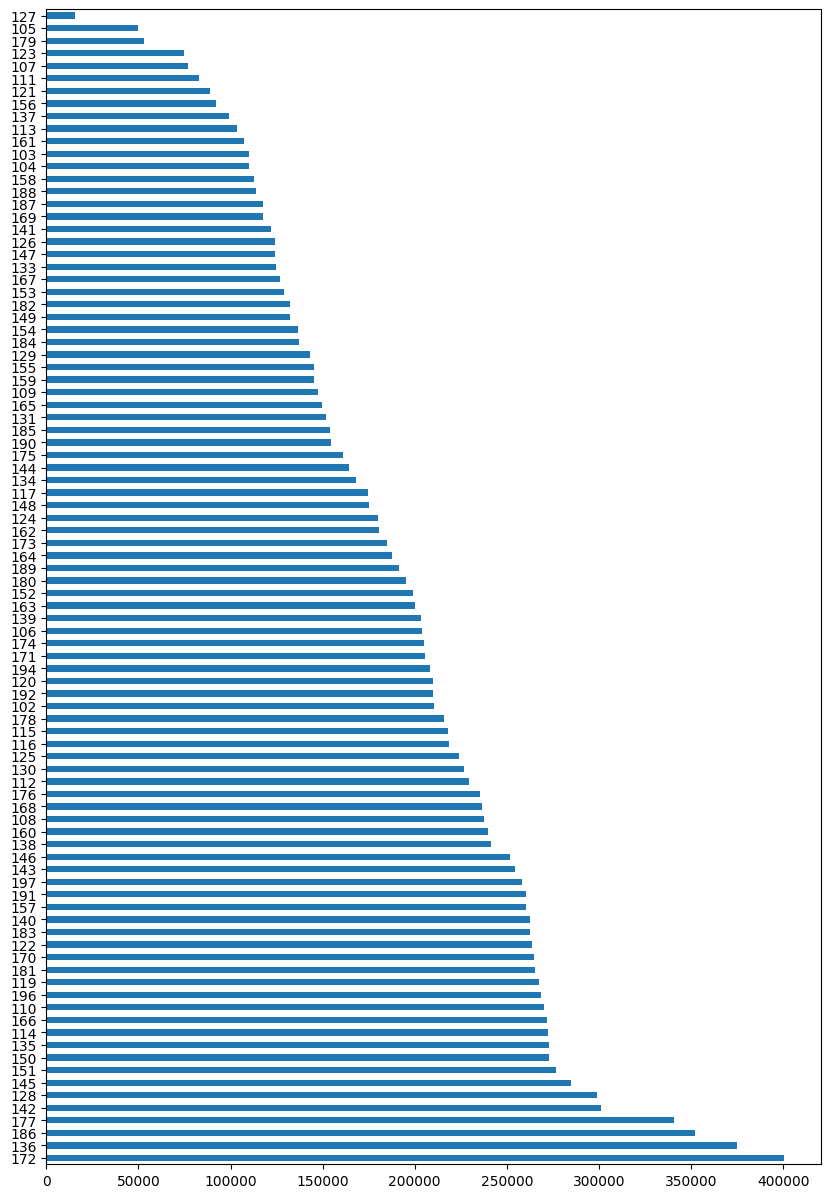

In [10]:
plt.figure(figsize=(10, 15))
data['mapped_veh_id'].value_counts().plot(kind='barh')

In [ ]:
timeseries = data[data['mapped_veh_id'] == 120].sort_values(by="timestamps_UTC")
timeseries["timestamps_UTC"] = pd.to_datetime(timeseries["timestamps_UTC"])
timeseries = timeseries.set_index("timestamps_UTC")
timeseries

In [ ]:
timeseries.index.max() - timeseries.index.min()

In [ ]:
timeseries["2023-05-02":"2023-05-3"]["RS_E_RPM_PC1"].plot(figsize=(30,10))
timeseries["2023-05-02":"2023-05-3"]["RS_E_RPM_PC2"].plot(figsize=(30,10))

In [ ]:
timeseries['RS_E_RPM_PC1'].ewm(span = 3600).mean().plot(figsize=(30,10))
timeseries['RS_E_RPM_PC2'].ewm(span = 3600).mean().plot(figsize=(30,10))


In [ ]:
timeseries = data[data['mapped_veh_id'] == 127].sort_values(by="timestamps_UTC")
timeseries["timestamps_UTC"] = pd.to_datetime(timeseries["timestamps_UTC"])
timeseries = timeseries.set_index("timestamps_UTC")

In [ ]:
timeseries[2000:2500]

### Latitude and longitude

Entries with wrong latitude or longitude

> Belgium spans 2 degrees in latitude, from 51 degrees 30 minutes N at Meerle (northernmost point) to 49 degrees 30 minutes N at Torgny (southernmost point). In longitude, it spans less than 4 degrees, from 2 degrees 33 minutes E to 6 degrees 24 minutes E.

https://www.belgium.be/en/about_belgium/country/geography

In [ ]:
data[(data["lon"] == 0) | (data["lat"] == 0)]

In [ ]:
data[(data["lat"] > 52) | (data["lat"] < 49)]

In [ ]:
data[(data["lon"] > 6.5) | (data["lon"] < 2)]

In [ ]:
data[(data["mapped_veh_id"] == 194) & (data["timestamps_UTC"] >= "2023-06-16 13:15") & (data["timestamps_UTC"] < "2023-06-16 13:30")].sort_values("timestamps_UTC")

Number of different coordinates

In [ ]:
unique_lat_lon = data[["lat", "lon"]].drop_duplicates()
print("# Unique coordinates: ", len(unique_lat_lon))
print("# Duplicate coordinates", len(data) - len(unique_lat_lon))

In [ ]:
unique_lat_lon = data[["lat", "lon"]].round(2).drop_duplicates()
print("# Unique coordinates: ", len(unique_lat_lon))
print("# Duplicate coordinates", len(data) - len(unique_lat_lon))

In [ ]:
unique_lat_lon = data[["timestamps_UTC", "lat", "lon"]].drop_duplicates()
print("# Unique coordinates: ", len(unique_lat_lon))
print("# Duplicate coordinates", len(data) - len(unique_lat_lon))

### Temperatures

#### Water

In [ ]:
data[(data["RS_E_WatTemp_PC1"] == 0) |  (data["RS_E_WatTemp_PC2"] == 0)]

In [ ]:
data[(data["RS_E_WatTemp_PC1"] < 0) |  (data["RS_E_WatTemp_PC2"] < 0)]

In [ ]:
data[(data["RS_E_WatTemp_PC1"] > 100) | (data["RS_E_WatTemp_PC2"] > 100)]

In [ ]:
data[(data["RS_E_WatTemp_PC1"] > 100) | (data["RS_E_WatTemp_PC2"] > 100)]

#### Air

In [ ]:
data[(data["RS_E_InAirTemp_PC1"] == 0) |  (data["RS_E_InAirTemp_PC2"] == 0)]

In [ ]:
data[(data["RS_E_InAirTemp_PC1"] > 65) |  (data["RS_E_InAirTemp_PC2"] > 65)]

In [ ]:
data[(data["RS_E_InAirTemp_PC1"] > 130) |  (data["RS_E_InAirTemp_PC2"] > 130)]

#### Oil

In [ ]:
data[(data["RS_T_OilTemp_PC1"] == 0) |  (data["RS_T_OilTemp_PC2"] == 0)]

In [ ]:
# freeze at -10
data[(data["RS_T_OilTemp_PC1"] < 0) |  (data["RS_T_OilTemp_PC2"] < 0)]

In [ ]:
data[(data["RS_T_OilTemp_PC1"] > 115) |  (data["RS_T_OilTemp_PC2"] > 115)]

### Pressure

In [ ]:
data[(data["RS_E_OilPress_PC1"] == 0) | (data["RS_E_OilPress_PC2"] == 0)]

In [ ]:
data[(data["RS_E_OilPress_PC1"] > 500) | (data["RS_E_OilPress_PC2"] > 500)]

### RPM

In [ ]:
data[(data["RS_E_RPM_PC1"] == 0) | (data["RS_E_RPM_PC2"] == 0)]

In [ ]:
data[(data["RS_E_RPM_PC1"] == 0) & (data["RS_E_RPM_PC2"] == 0)]

In [ ]:
data[(data["RS_E_RPM_PC1"] > 2500) | (data["RS_E_RPM_PC2"] > 2500)]

In [ ]:
"../data/sorted_full_data.csv"